# **A Jupyter widget to plot the bandstructure and density of states (DOS)**

**Source code**: https://github.com/osscar-org/widget-bandsplot

<hr style="height:1px;border:none;color:#cccccc;background-color:#cccccc;" />

<p style="text-align: justify;font-size:15px">
    This widget facilitates the plotting of electronic bandstructure and density of states from supplied json files.
</p>

```{image} ./images/bands.png
:alt: image bandstructure
:class: bg-primary mb-1
:width: 800px
:height: 500px
:align: center
```


## **Input json files**

<p style="text-align: justify;font-size:15px">
    On the left, it plots the bandstructures. One can input several bandstructure json files as a list.
    The figure on the right shows the density of states, which can only show one DOS plot. The json files
    for the bandstructures can be generated from AiiDA with the verdi command:
</p>

```bash
verdi data bands export --format json <IDENTIFIER>
```

<p style="text-align: justify;font-size:15px">
    The json format for the DOS can be checked in the github repository.
</p>

<a href="https://raw.githubusercontent.com/osscar-org/widget-bandsplot/develop/example/Si_pdos_data.json">
https://raw.githubusercontent.com/osscar-org/widget-bandsplot/develop/example/Si_pdos_data.json</a>

<p style="text-align: justify;font-size:15px">
    Here, one needs to use the json package to load the json file and pass it to the widget.
</p>

```python
with open('Si_bandsdata.json', 'r') as file:
    data1 = json.load(file)
    
with open('Si_pdos_data.json', 'r') as file:
    data2 = json.load(file)
```

## **Fermi energy**

<p style="text-align: justify;font-size:15px">
    The Fermi energy is read from the bands and DOS json files. The bandstructure and density 
    of states plots have their origins aligned according to the provided Fermi energy (the Fermi energy is defined to be zero).
</p>

<p style="text-align: justify;font-size:15px">
    In the default plot for the DOS, there is a horizontal line to highlight the Fermi level. One 
    can turn it off by setting plot_fermilevel = False. The legend of the DOS can be turned off
    by setting show_legend = False.
</p>

## **Usage of the widget**

<p style="text-align: justify;font-size:15px">
    Remeber to pass the bandstructure data as a list of json objects. "energy_range" sets the 
    energy range for the plots.
</p>

###  **Plot both bandstructure and DOS**
```python
w1 = BandsPlotWidget(bands=[data1], dos=data2, plot_fermilevel = True, energy_range = {"ymin": -13.0, "ymax": 10.0})
display(w1)
```

In [6]:
from widget_bandsplot import *
import json
from copy import deepcopy

In [7]:
with open('Si_bands.json', 'r') as file:
    data1 = json.load(file)
    
with open('Si_dos.json', 'r') as file:
    data2 = json.load(file)

In [8]:
w1 = BandsPlotWidget(bands=[data1], dos=data2, plot_fermilevel = True, show_legend = True, energy_range = {"ymin": -13.0, "ymax": 10.0})
display(w1)

BandsPlotWidget(band_fermienergy=[5.9674316075856], bands=[{'label': '', 'path': [['GAMMA', 'X'], ['X', 'U'], …

<p style="text-align: justify;font-size:15px">
    There are inputrea and button widgets below the figures. The inputarea widgets can be used to edit
    the k-point path. The buttons are used to manipulate the figures and toggle plotting of the projected density of states.
</p>

<p style="text-align: justify;font-size:15px">
    One can also reuse the data from the widget and plot the DOS using matplotlib.   
</p>

```python
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(w.tdos_x, w.tdos_y, 'k')

ax.fill_between(w.tdos_x, 0, w.tdos_y, color="red")
ax.set_ylim([0, 2.2])
ax.axvline(w.fermi_energy, color='black')

plt.show()
```

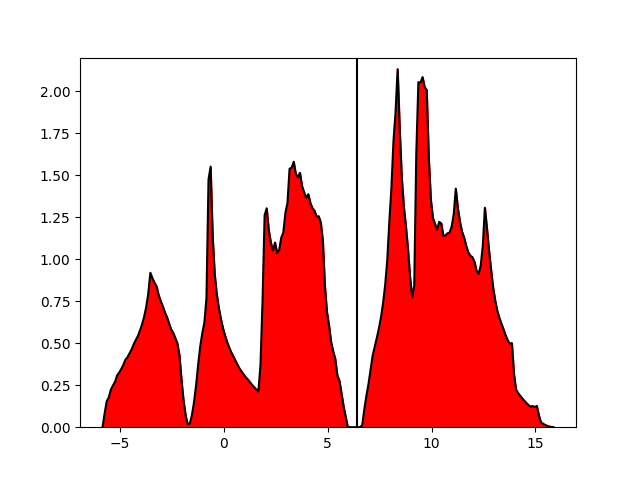

In [9]:
%matplotlib widget

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(w1.tdos_x, w1.tdos_y, 'k')

ax.fill_between(w1.tdos_x, 0, w1.tdos_y, color="red")
ax.set_ylim([0, 2.2])
ax.axvline(w1.dos_fermienergy, color='black')

plt.show()

```{image} ./images/dos.png
:alt: image bandstructure
:class: bg-primary mb-1
:width: 500px
:align: center
```
